In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string 
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data_fake =pd.read_csv('Fake.csv')
data_true =pd.read_csv('True.csv')

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.tail ()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
data_fake["class"] =0
data_true["class"] =1

In [6]:
data_fake_manual_testing = data_fake.tail(10)
data_true_manual_testing = data_true.tail(10)
data_fake=data_fake.iloc[:-10]
data_true=data_true.iloc[:-10]

In [7]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge=data_merge.sample(frac=1).reset_index(drop=True) 

In [9]:
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

In [10]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]','',text)
    text = re.sub(r"\\W"," ",text)
    text = re.sub(r'https?://\S+|www\.\S+','', text)
    text = re.sub(r'<.*?>+', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub(r'\w*\d\w*','', text)
    return text
data['text'] = data['text'].apply(wordopt)

In [11]:
x = data['text']
y = data['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorization = TfidfVectorizer() 
xv_train = vectorization.fit_transform(x_train) 
xv_test = vectorization.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression ()
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
print("Logistic Regression:\n",classification_report(y_test, pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5909
           1       0.98      0.99      0.99      5311

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier ()
DT.fit(xv_train,y_train)
pred_dt = DT.predict(xv_test)
print("Decision Tree:\n", classification_report(y_test, pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5909
           1       1.00      0.99      0.99      5311

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [16]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)
pred_gb = GB.predict(xv_test)
print("Gradient Boosting:\n", classification_report(y_test, pred_gb))


Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5909
           1       0.99      1.00      1.00      5311

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [17]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(random_state=0) 
RF.fit(xv_train, y_train) 
pred_rf = RF.predict(xv_test) 
print("Random Forest:\n", classification_report(y_test, pred_rf)) 

Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5909
           1       0.99      0.99      0.99      5311

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [18]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A fake News"
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame (testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)

    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    #pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print (f"\n\nLR Prediction: {output_label(pred_LR[0])}\n"
                  f"DT Prediction: {output_label(pred_DT[0])}\n"
                  #f"GBC Prediction: {output_label(pred_GB[0])}\n"
                  f"RFC Prediction: {output_label(pred_RF[0])}\n" )

In [19]:
news =input("Enter news text: ")
manual_testing(news)

Enter news text:  SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge â€œmuch moreâ€ to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     â€œWhy is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!â€ Trump wrote on Twitter.  The presidentâ€™s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of it



LR Prediction: Not A fake News
DT Prediction: Not A fake News
RFC Prediction: Not A fake News



In [20]:
news =input("Enter news text: ")
manual_testing(news)

Enter news text:  On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to s



LR Prediction: Fake News
DT Prediction: Fake News
RFC Prediction: Fake News



In [23]:
model=RF


In [24]:
import joblib

# Replace 'model' with the variable holding your trained model
joblib.dump(model, 'fake_news_model.pkl')
print("Model saved as 'fake_news_model.pkl'")


Model saved as 'fake_news_model.pkl'


In [25]:
# Save the vectorizer
joblib.dump(vectorization, 'vectorizer.pkl')
print("Vectorizer saved as 'vectorizer.pkl'")


Vectorizer saved as 'vectorizer.pkl'


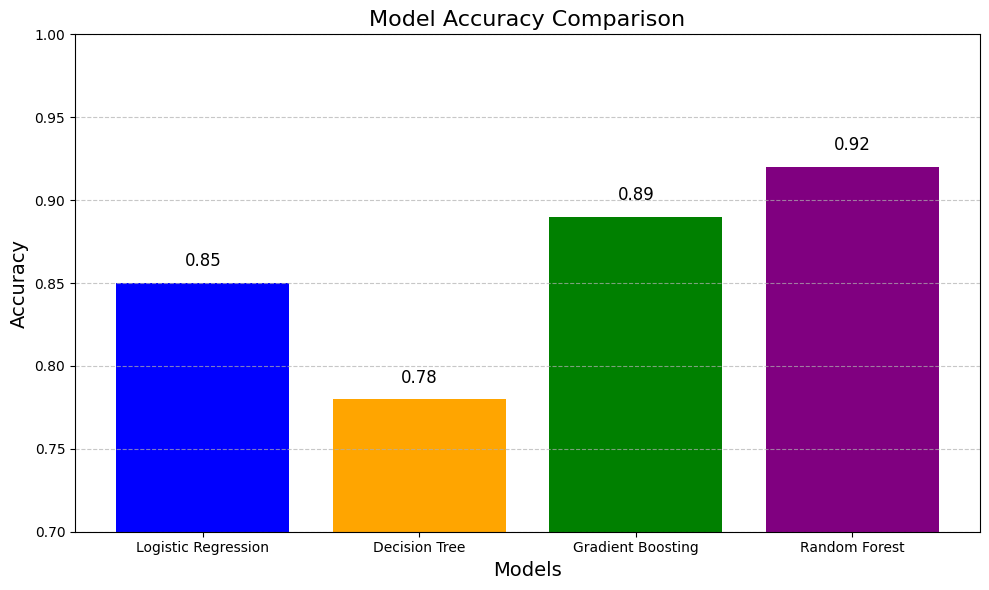

In [2]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies (replace these with your actual results)
models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracies = [0.85, 0.78, 0.89, 0.92]  # Replace with your accuracy scores

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])

# Add chart details
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.7, 1)  # Adjust the range as needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values above bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()
